In [1]:
from qiskit import *

In [2]:
# Building a 2 qubit quantum register
qr =  QuantumRegister(2)

In [3]:
# classical bits/ registers to take measurements from these quantum bits
cr = ClassicalRegister(2)

In [4]:
circuit = QuantumCircuit(qr, cr)

In [5]:
%matplotlib inline

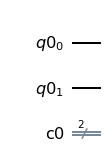

In [6]:
circuit.draw(output='mpl')

In [7]:
# lets apply hadamard gate on the first qubit
circuit.h(qr[0])

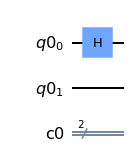

In [8]:
circuit.draw(output='mpl')

In [9]:
# two qubit operation CX (equivalent of logical if)
# circuit.cx(control_qubit, target_qubit)
circuit.cx(qr[0], qr[1])

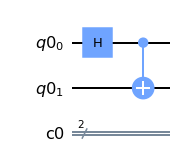

In [10]:
circuit.draw(output='mpl')

In [11]:
# measure the quantum bits and store them in classical bits
circuit.measure(qr, cr)

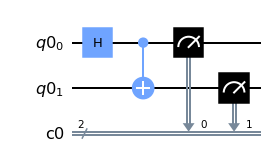

In [12]:
circuit.draw(output='mpl')

In [13]:
# simulation of quantum circuit on local machine
simulator = Aer.get_backend('qasm_simulator')

In [28]:
execute(circuit, backend = simulator)

In [29]:
# now that we've executed the quantum circuit
# let's see what the results are
result = execute(circuit, backend = simulator).result()

In [30]:
from qiskit.tools.visualization import plot_histogram

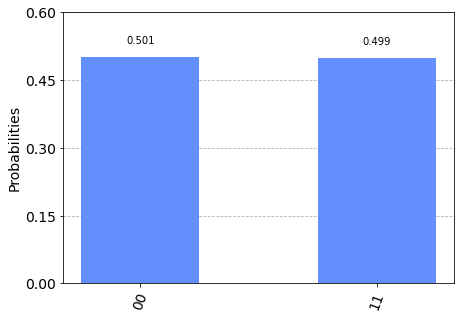

In [31]:
plot_histogram(result.get_counts(circuit))

In [38]:
# we get something around 50/50, it being not exactly 50/50
# is because we are running limited number of shots and not infinit
# number of shots. Now let's run it on a Quantum computer at IBM and see
# what happens
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-08-20 20:37:39,481: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [39]:
provider = IBMQ.get_provider('ibm-q')

In [40]:
qcomp = provider.get_backend('ibmq_santiago')

In [41]:
job = execute(circuit, backend=qcomp)

In [42]:
from qiskit.tools.monitor import job_monitor

In [45]:
job_monitor(job)

Job Status: job has successfully run


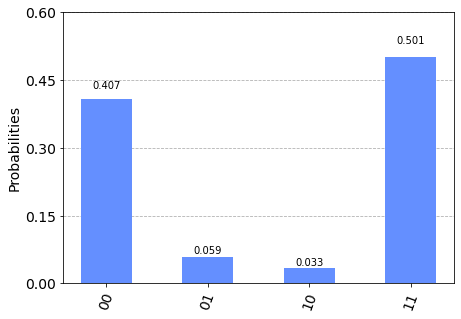

In [47]:
result = job.result()
plot_histogram(result.get_counts(circuit))